## Perguntas

Quais fatores tornaram as pessoas mais propensas a sobreviver?
1. **Uma boa posição sócio-economica foi relevante para a sobrevivenci?**
2. **A idade foi determinante para sobrevivencia?**
3. **Mulheres e crianças tiveram prioridades nos botes salva-vidas?**


In [1]:
# gera os grafinos 'inline'
%matplotlib inline

# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# definindo o estilo para os graficos
sns.set_style("dark")

# carregando os dados
titanic_data = pd.read_csv('titanic-data-6.csv')

In [2]:
# exibindo os primeiros registros para uma analise previa
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# exibe as ultimas linhas do dataset
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [1]:
# dado essas informações iniciais, vamos responder algumas perguntas básicas
# 1. quantidade de sobreviventes e mortos
titanic_data_total_sobreviventes = titanic_data['Survived'] == 1
titanic_data_total_mortos = titanic_data['Survived'] == 0

print('A quantidade total de sobreviventes foi de: {} e a de mortos foi de: {}'.format(titanic_data_total_sobreviventes.sum(), titanic_data_total_mortos.sum()))

# 2. quantidade de bilhetes unicos e duplicados
titanic_data_bilhetes_duplicados = titanic_data['Ticket'].duplicated().sum()
titanic_data_bilhetes_unicos = titanic_data['Ticket'].count() - titanic_data_bilhetes_duplicados
print('Bilhetes unicos: {}, bilhetes duplicados: {}'.format( titanic_data_bilhetes_unicos, titanic_data_bilhetes_duplicados))

NameError: name 'titanic_data' is not defined

### Fase para limpar os dados

Levando em consideração as perguntas a serem respondidas, algumas colunas serão desnecessárias. Entre elas:

- Name
- Ticket
- Cabin
- Fare
- Embarked

#### Passo 1 da fase de limpeza - remover dados duplicados(se existirem)

In [7]:
# identificando linhas duplicadas e as removendo
titanic_data_duplicados = titanic_data.duplicated()

if titanic_data_duplicados.sum() > 0:
    titanic_data.drop_duplicates(inplace=True)

#### Passo 2 da fase de limpeza de dados - remover as colunas que julgamos ser desnecessárias

In [21]:
# criando um dataset 'limpo'
titanic_data_limpo = titanic_data.drop(['Name','Ticket','Cabin','Fare','Embarked'], axis=1)
titanic_data_limpo.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


#### Passo 3 da fase de limpeza de dados - arrumando o formato dos dados

In [22]:
# quantidad de valores faltando
titanic_data_limpo.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
dtype: int64

## Data Exploration and Visualization

In [23]:
# analisando algumas estatisticas basicas
titanic_data_limpo.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


In [27]:
# uma nalise melhor das idade
titanic_data_limpo[titanic_data_limpo['Age'] <= 5].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
7,8,0,3,male,2.0,3,1
10,11,1,3,female,4.0,1,1
16,17,0,3,male,2.0,4,1
43,44,1,2,female,3.0,1,2
58,59,1,2,female,5.0,1,2


Esssa tabela mostra algumas informações de passageiros com idade menor ou igual a 5 anos.
Uma melhor analise das idades será feita mais adiante 

## Pergunta 1
A questão socio-economica na sobrevivencia

In [17]:
# taxa de sobrevivencia classe x sexo
def taxa_sobrevivencia_classe_sexo(pclass, sexo):
    """
    Args:
        pclass: classe entre 1,2 ou 3
        sexo: male ou female
    Returns:
        taxa de sobrevivencia(%)
    """
    agrupado = titanic_data_limpo.groupby(['Pclass', 'Sex']).size()[pclass,sexo].astype('float')
    agrupamento_sexo_sobrevivente = \
        titanic_data_limpo.groupby(['Pclass','Survived','Sex']).size()[pclass,1,sexo].astype('float')
    taxa_sobrevivencia_por_sexo = (agrupamento_sexo_sobrevivente / agrupado * 100).round(2)
    
    return taxa_sobrevivencia_por_sexo

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64
Classe 1 - female taxa: 96.81%
Classe 1 - male taxa: 36.89%
-----
Classe 2 - female taxa: 92.11%
Classe 2 - male taxa: 15.74%
-----
Classe 3 - female taxa: 50.0%
Classe 3 - male taxa: 13.54%


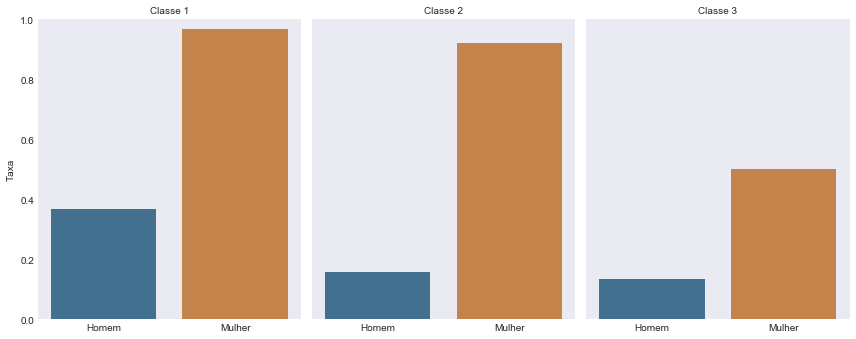

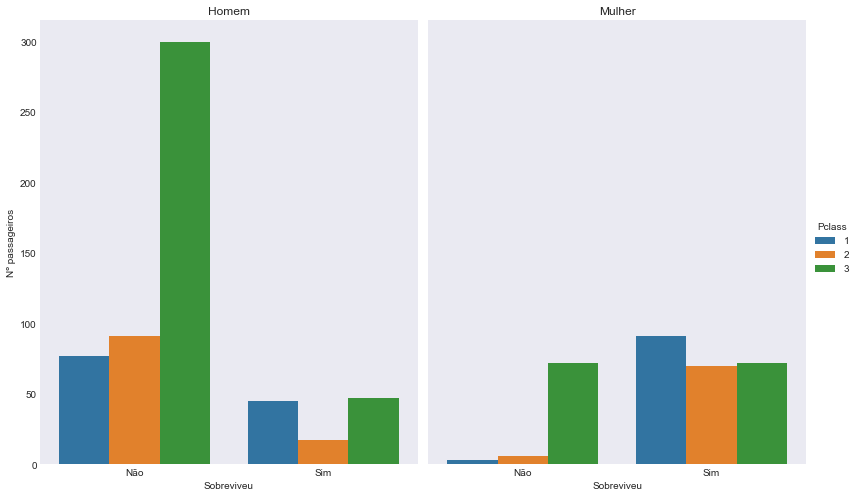

In [22]:
# sobreviventes agrupado por classe, sexo
quantidade_sobrevivente_classe = titanic_data_limpo.groupby(['Pclass','Survived','Sex']).size()

# exibindo a porcentagem de sobreviventes
print (quantidade_sobrevivente_classe)
print ('Classe 1 - female taxa: {}%'.format(taxa_sobrevivencia_classe_sexo(1,'female')))
print ('Classe 1 - male taxa: {}%'.format(taxa_sobrevivencia_classe_sexo(1,'male')))
print ('-----')
print ('Classe 2 - female taxa: {}%'.format(taxa_sobrevivencia_classe_sexo(2,'female')))
print ('Classe 2 - male taxa: {}%'.format(taxa_sobrevivencia_classe_sexo(2,'male')))
print ('-----')
print ('Classe 3 - female taxa: {}%'.format(taxa_sobrevivencia_classe_sexo(3,'female')))
print ('Classe 3 - male taxa: {}%'.format(taxa_sobrevivencia_classe_sexo(3,'male')))

# exibindo grafico dos sobreviventes
g = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=titanic_data_limpo, 
                   saturation=.5, kind="bar", ci=None, size=5, aspect=.8)

# labels
(g.set_axis_labels('', 'Taxa')
     .set_xticklabels(["Homem", "Mulher"])
     .set_titles("Classe {col_name}")
     .set(ylim=(0, 1))
     .despine(left=True, bottom=True))

# plotando
g = sns.factorplot('Survived', col='Sex', hue='Pclass', data=titanic_data_limpo, kind='count', size=7, aspect=.8)

# mais labels...
(g.set_axis_labels('Sobreviveu', 'Nº passageiros')
    .set_xticklabels(["Não", "Sim"])
    .set_titles('{col_name}')
)

titles = ['Homem', 'Mulher']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

**Em todas as comparações feitas a classe 1 sempre apresentou um maior indice de sobreviventes, então é sensato afirmar que a classe foi um fator que influenciou na sobrevivencia.**

## Pergunta 2
A questão da idade

Numero de homens e mulheres cuja idade não está informada 53, 124
Total de sobreviventes 290 
Total de mortos 424 
Idade média dos sobreviventes 28.0 
Idade média dos mortos 31.0 



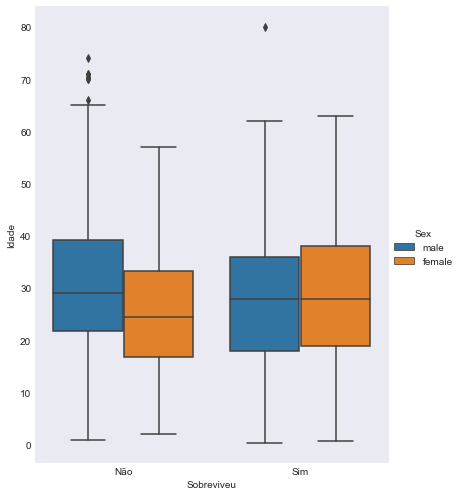

In [36]:
female_sem_idade = titanic_data_limpo[pd.isnull(titanic_data_limpo['Age'])]['Sex'] == 'female'
male_sem_idade = titanic_data_limpo[pd.isnull(titanic_data_limpo['Age'])]['Sex'] == 'male'

print ('Numero de homens e mulheres cuja idade não está informada {}, {}'.format(
female_sem_idade.sum(), male_sem_idade.sum()))

# limpando novamente os dados removendo os NaN
titanic_data_idade_limpo = titanic_data_limpo.dropna()

# quantidade total de mortos e sobreviventes
quantidade_sobreviventes = titanic_data_idade_limpo[titanic_data_idade_limpo['Survived'] == True]['Survived'].count()
quantidade_mortos = titanic_data_idade_limpo[titanic_data_idade_limpo['Survived'] == False]['Survived'].count()

idade_media_sobreviventes = titanic_data_idade_limpo[titanic_data_idade_limpo['Survived'] == True]['Age'].mean()
idade_media_mortos = titanic_data_idade_limpo[titanic_data_idade_limpo['Survived'] == False]['Age'].mean()

# exibindo algumas informações
print ('Total de sobreviventes {} \n\
Total de mortos {} \n\
Idade média dos sobreviventes {} \n\
Idade média dos mortos {} \n'.format(quantidade_sobreviventes, quantidade_mortos, np.round(idade_media_sobreviventes), 
        np.round(idade_media_mortos)))
        
# grafico
g = sns.factorplot(x="Survived", y="Age", hue='Sex', data=titanic_data_idade_limpo, kind="box", size=7, aspect=.8);

# definindo labels
(g.set_axis_labels('Sobreviveu', 'Idade')
    .set_xticklabels(["Não", "Sim"])
);

Baseado no gráfico podemos concluir que a idade não foi um fator determinante para a sobrevivencia.
Os valores dos sobreviventes e dos não-sobreviventes estão muito proximos uns dos outros, fazendo com que o fator da idade seja uma variavel não muito confiavel.

## Pergunta 3
Preferencia para mulheres e crianças

C:\Users\Bianca\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Bianca\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Classificacao  Survived
Criança        0            52
               1            61
Homem          0           325
               1            70
Mulher         0            47
               1           159
dtype: int64


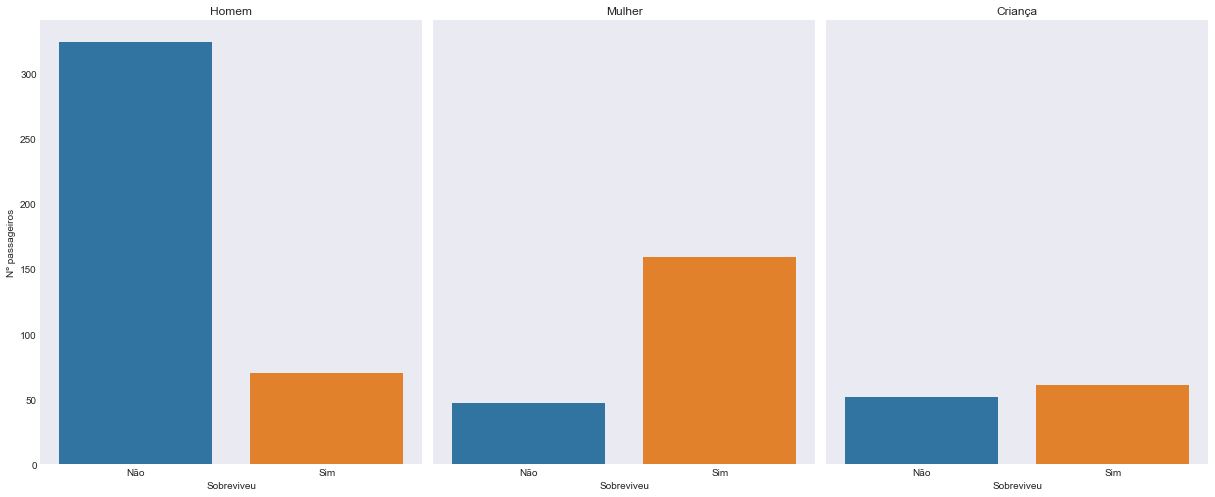

In [38]:
# classificando os dados
titanic_data_idade_limpo.loc[
    ( (titanic_data_idade_limpo['Sex'] == 'female') & 
    (titanic_data_idade_limpo['Age'] >= 18) ),
    'Classificacao'] = 'Mulher'

titanic_data_idade_limpo.loc[
    ( (titanic_data_idade_limpo['Sex'] == 'male') & 
    (titanic_data_idade_limpo['Age'] >= 18) ),
    'Classificacao'] = 'Homem'

titanic_data_idade_limpo.loc[
    (titanic_data_idade_limpo['Age'] < 18),
    'Classificacao'] = 'Criança'

# obtem a classificacao dos sobreviventes
print (titanic_data_idade_limpo.groupby(['Classificacao','Survived']).size())

# comparação entre as classificações
g = sns.factorplot('Survived', col='Classificacao', data=titanic_data_idade_limpo, kind='count', size=7, aspect=.8)

# labels...
(g.set_axis_labels('Sobreviveu', 'Nº passageiros')
    .set_xticklabels(['Não', 'Sim'])
)

titles = ['Homem', 'Mulher', 'Criança']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

Analisando os graficos podemos concluir que as mulheres e crianças tiveram sim preferencia. Para a analise foi considerado como 'criança' alguem com idade < 18, então esses valores para as crianças podem não estar representando a verdadeira realidade. Mas independente disso, legal saber que as mulheres e crianças, de alguma forma, tiveram a preferencia respeitada.

# Conclusão

Os resultados da análise, embora provisórios, parecem indicar que classe e sexo, ou seja, ser uma mulher com posição socioeconômica superior (primeira classe), dariam uma melhor chance de sobrevivência quando a tragédia ocorresse no Titanic. A idade não parece ser um fator importante. Apesar de ser um homem na terceira classe, deu a menor chance de sobrevivência. Mulheres e crianças, em todas as classes, tendem a ter uma taxa de sobrevivência mais alta do que os homens em genenal, mas de forma alguma sendo uma criança ou uma mulher garantiria sua sobrevivencia.

## Referencias

- https://www.kaggle.com/c/titanic/data
- http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/tree/master/cookbook/
- https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html#seaborn.factorplot
- http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3865739/